In [1]:
import pandas as pd
import re
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
import nltk
from nltk.corpus import stopwords
from pprint import pprint
import pyLDAvis.gensim
import pickle
import pyLDAvis

In [2]:
df = pd.read_csv("input/app_v1_feedback.txt", sep="\t", header=0, encoding = "latin1")

In [3]:
df.head()

,person_id,segment_id,text,tags
0,1,1,Jetzt sehen Sie vermutlich die Startseite. OK....,{general}
1,1,2,Ja genau. Vielleicht hätte ich jetzt Lektion d...,{general}
2,1,3,"OK, das heißt ich geb jetzt hier meine Initial...",{general}
3,1,4,"Und den Code muss ich irgendwie kopieren, oder?",{general}
4,1,5,"OK. Ach das steht auch da, muss ich mir nichts...",{general}


In [4]:
df = df.drop(columns=['person_id', 'segment_id', 'tags'], 
             axis = 1)

In [5]:
df.head()

,text
0,Jetzt sehen Sie vermutlich die Startseite. OK....
1,Ja genau. Vielleicht hätte ich jetzt Lektion d...
2,"OK, das heißt ich geb jetzt hier meine Initial..."
3,"Und den Code muss ich irgendwie kopieren, oder?"
4,"OK. Ach das steht auch da, muss ich mir nichts..."


In [40]:
df['text_processed'] = \
df['text'].map(lambda x: re.sub('[,.!?]', '', x))

In [44]:
df['text_processed'] = \
df['text_processed'].map(lambda x: x.lower())

In [8]:
df['text_processed'].head()

0    jetzt sehen sie vermutlich die startseite ok w...
1    ja genau vielleicht hätte ich jetzt lektion da...
2    ok das heißt ich geb jetzt hier meine initiale...
3        und den code muss ich irgendwie kopieren oder
4    ok ach das steht auch da muss ich mir nichts m...
Name: text_processed, dtype: object

In [9]:
long_string = ','.join(list(df['text_processed'].values))

In [10]:
wordcloud = WordCloud(background_color = "white", max_words = 500, 
                      contour_width = 3, 
                      contour_color = 'steelblue')

C:\Users\vanandkuma\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


In [ ]:
wordcloud.generate(long_string);

C:\Users\vanandkuma\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\_memmapping_reducer.py:611: UserWarning: Failed to delete temporary folder: C:\Users\VANAND~1\AppData\Local\Temp\joblib_memmapping_folder_83340_8344a9e856d7479e82c7bf7ffe662bf9_9cc97364a3cc4f4082ac31d90a49ba93
  warnings.warn("Failed to delete temporary folder: {}"
C:\Users\vanandkuma\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\_memmapping_reducer.py:611: UserWarning: Failed to delete temporary folder: C:\Users\VANAND~1\AppData\Local\Temp\joblib_memmapping_folder_83340_68e34167ea0d49e4be6d9f6c5ccf5234_f977f92e88c04e1885516fac19ead64a
  warnings.warn("Failed to delete temporary folder: {}"
C:\Users\vanandkuma\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\_memmapping_reducer.py:611: UserWarning: Failed to delete temporary folder: C:\Users\VANAND~1\AppData\Local\Temp\joblib_memmapping_folder_83340_8344a9e856d7479e82c7bf7ffe662bf9_dae2648794ec455885ef2581f6b5d5c8
  w

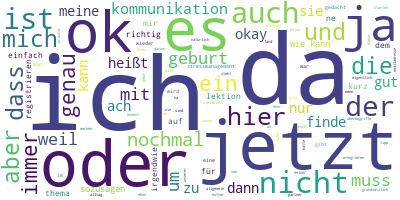

In [12]:
wordcloud.to_image()

In [13]:
stop_words = stopwords.words('german')

In [15]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), 
                                             deacc = True))

In [16]:
def remove_stopwords(texts):
    return[[word for word in simple_preprocess(str(doc)) 
            if word not in stop_words] for doc in texts]

In [17]:
data = df.text_processed.values.tolist()
data_words = list(sent_to_words(data))

In [18]:
data_words = remove_stopwords(data_words)

In [133]:
#print(data_words)

In [19]:
id2word = corpora.Dictionary(data_words)

In [20]:
texts = data_words

In [21]:
corpus = [id2word.doc2bow(text) for text in texts]

In [137]:
#pprint(corpus)

In [30]:
num_topics = 2

In [31]:
lda_model = gensim.models.LdaMulticore(corpus = corpus, 
                                       id2word = id2word, 
                                       num_topics = num_topics)

In [32]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.038*"ja" + 0.026*"ok" + 0.015*"genau" + 0.014*"immer" + 0.013*"nochmal" + '
  '0.013*"heißt" + 0.013*"ach" + 0.012*"finde" + 0.011*"ne" + 0.011*"gedacht"'),
 (1,
  '0.040*"ok" + 0.022*"ja" + 0.014*"okay" + 0.014*"nochmal" + 0.013*"geburt" + '
  '0.013*"immer" + 0.011*"genau" + 0.010*"sozusagen" + 0.010*"kommunikation" + '
  '0.010*"training"')]


In [33]:
pyLDAvis.enable_notebook()

LDAvis_data_filepath = 'output/ldavis_prepared_topics_three'

In [34]:
if __name__ == '__main__':
    if 1 == 1:
        LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, 
                                                  id2word)
        with open(LDAvis_data_filepath, 'wb') as f:
            pickle.dump(LDAvis_prepared, f)

In [35]:
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

In [36]:
pyLDAvis.save_html(LDAvis_prepared, 'output/ldavis_prepared_topics_three.html')

In [37]:
LDAvis_prepared

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.015571  0.0       1        1  52.580218
0     -0.015571  0.0       2        1  47.419782, topic_info=              Term      Freq     Total Category  logprob  loglift
33              ja  9.000000  9.000000  Default  30.0000  30.0000
68        training  1.000000  1.000000  Default  29.0000  29.0000
43              ne  2.000000  2.000000  Default  28.0000  28.0000
124        gedacht  2.000000  2.000000  Default  27.0000  27.0000
9            heißt  2.000000  2.000000  Default  26.0000  26.0000
..             ...       ...       ...      ...      ...      ...
157  kommunikation  1.373666  3.086643   Topic2  -4.7047  -0.0635
90           darum  0.973063  1.811852   Topic2  -5.0495   0.1245
7           geburt  1.505131  3.742579   Topic2  -4.6133  -0.1648
168      sozusagen  1.338621  3.096084   Topic2  -4.7306  -0.0924
6              fur  1.136728  2.459116   Topic2  -4.8940  -0.0255

[131 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
38        1  0.340545             ach
38        2  0.681090             ach
87        1  0.534466              ah
87        2  0.534466              ah
116       2  0.844372          ahnung
...     ...       ...             ...
46        2  0.843872  wahrscheinlich
69        1  0.768015            ware
70        1  0.768351      webbasiert
141       2  0.842677           wegen
71        1  0.769202          wissen

[132 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])